In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

conn = sqlite3.connect("../db/baltasar.db")
def sql(query):
    return pd.read_sql_query(query, conn)

In [2]:
sql('''
SELECT rcv, SUM(isDepositAddress) / (1.0*count(*)) as matchedPercentage, sum(behavedLikeDepositAddress) as behavedLikeDepositAddresses, sum(isDepositAddress) as numDepositAddresses, count(*) as distinctIndegree FROM
    (SELECT distinct sender.address as snd, receiver.address as rcv, sender.isDepositAddress, senderM.behavedLikeDepositAddress
        from address receiver INNER JOIN
            address sender INNER JOIN
            AddressMetadata senderM INNER JOIN
            transfer t
            ON receiver.address = t.`to` and sender.address = t.`from` and receiver.isCappReceiver = 1 and sender.address = senderM.address) a
group by rcv
order by matchedPercentage
''')

,rcv,matchedPercentage,behavedLikeDepositAddresses,numDepositAddresses,distinctIndegree
0,0x279822cb96350a2274ba5e29dfda912742d29071,0.544238,3254,3254,5979
1,0x51b0fc1aa2b93cef81293fc5681d4574d2bc63fb,0.592956,1023,1027,1732
2,0x2585fc82e7d32246fbfd9e17bb3c7faeb241570e,0.594499,728,843,1418
3,0x5f8e427c54d95fdc0e5d1834df386a8374162080,0.595210,2883,3057,5136
4,0xe33450cdad97b01d12b4bc8cda5166a85b6234e0,0.603960,180,183,303
5,0x9b39600c9b1865c6421da7616bdb9f47ae330eaa,0.609053,147,148,243
6,0x8a88f04e0c905054d2f33b26bb3a46d7091a039a,0.609074,901,980,1609
7,0x981ffce005c1f8d108aa26b45bcbaf43e39c8190,0.609290,222,223,366
8,0xbe92c27a73d1f287fd7eb53692bb3fb3c7b69730,0.617555,192,197,319
9,0x027beaf47b1eb9ead1f6c9ed7b1d08744083fa59,0.619048,138,143,231


In [5]:
data = pd.read_csv('../expOutput_v3.csv')


def identify_pareto(data):
    data['numalsePositivesInverted'] = -data['numFalsePositives']
    scores = data[['numDepositAddresses', 'numalsePositivesInverted']].values
    data = data.drop(columns="numalsePositivesInverted")
    # Count number of items
    population_size = scores.shape[0]
    # Create a NumPy index for scores on the pareto front (zero indexed)
    population_ids = np.arange(population_size)
    # Create a starting list of items on the Pareto front
    # All items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population_size, dtype=bool)
    # Loop through each item. This will then be compared with all other items
    for i in range(population_size):
        # Loop through all other items
        for j in range(population_size):
            # Check if our 'i' pint is dominated by out 'j' point
            if all(scores[j] >= scores[i]) and any(scores[j] > scores[i]):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break
    # Return ids of scenarios on pareto front
    data['Pareto Dominant'] = pareto_front
    return data

data = identify_pareto(data)
data['numDepoMil'] = data['numDepositAddresses'] / 1000000

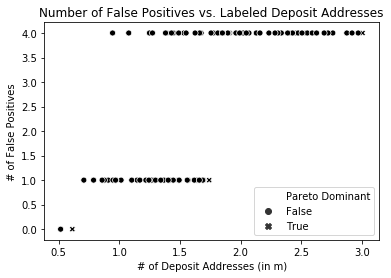

In [6]:
ax = sns.scatterplot(data=data, x='numDepoMil', y='numFalsePositives', style='Pareto Dominant', color="black")
ax.set_ylabel("# of False Positives")
ax.set_xlabel("# of Deposit Addresses (in m)")
ax.set_title('Number of False Positives vs. Labeled Deposit Addresses')
plt.savefig('fig.pdf')

In [9]:
data[data['Pareto Dominant']]

,numBlocks,percentage,numCappReceivers,numDepositAddresses,numFalsePositives,fps,Pareto Dominant,numDepoMil
16,360,0.75,245,612701,0,NaN,True,0.612701
72,60480,0.10,1467,3005551,4,0xcf7787ca25010d3dbfa2ccc32ea58d2160290ef4|0xb...,True,3.005551
89,51840,0.50,1209,1740649,1,0xbbc79794599b19274850492394004087cbf89710,True,1.740649


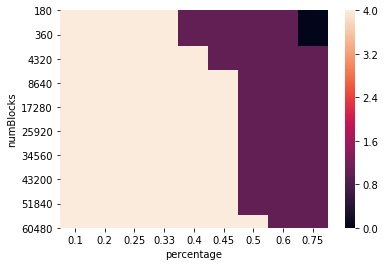

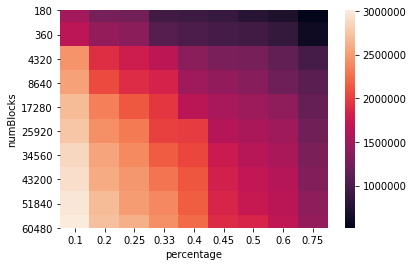

In [41]:
sns.heatmap(data.pivot('numBlocks', 'percentage', 'numFalsePositives'))
plt.show()
sns.heatmap(data.pivot('numBlocks', 'percentage', 'numDepositAddresses'))
plt.show()

In [10]:
sql('''SELECT m.* FROM Address a NATURAL JOIN AddressMetadata m WHERE isDepositAddress = 1 and isCappReceiver = 0 ORDER BY distinctInDegree DESC LIMIT 500''')

,address,indegree,outdegree,degree,distinctDegree,distinctInDegree,distinctOutDegree,behavedLikeDepositAddress,involumeUSD,outvolumeUSD,outdegreeFraction,outvolumeFraction,isConcentrator,isMixer,isDiluter,firstOutBlocknumber,canBePaperWallet
0,0x38963071204b213801fb93c5bc3b45885a39d670,25120,1,25121,25120,25119,1,0,20999.16,20995.27,0.000040,0.999815,1,0,0,7398814,NO
1,0x04f7869f12dc0a14fa726c03989ef98986daedfb,4548,4,4552,4539,4538,1,0,3280.36,3255.79,0.000220,0.992510,1,0,0,5906557,NO
2,0x9636e1156018a67b6700f3beb8b7c0b471de5fd5,1656,1,1657,1657,1656,1,0,366.60,310.92,0.000604,0.848118,1,0,0,6452560,NO
3,0xe26644387c2306fcfc99f003e47176fa9aede043,602,4,606,602,601,1,0,43.49,46.32,0.001664,1.065072,1,0,0,6305414,NO
4,0x2dd4a213d13a6164a38dfedc36a466cca347aaba,407,42,449,401,400,1,0,2859.91,2860.81,0.002500,1.000315,1,0,0,4971330,NO
5,0xc1f9cf4dee39ce06280af9ef4679bdde78c19c38,359,1,360,360,359,1,0,0.64,0.89,0.002786,1.390625,1,0,0,5371995,NO
6,0xa4aa0c623189540b0b71e30e637bcd5099281e20,319,6,325,319,318,1,0,30.53,30.25,0.003145,0.990829,1,0,0,6603891,NO
7,0x47c5e92a51dc269d18d191add0c7e06348f5a206,310,1,311,311,310,1,0,165753.31,200965.86,0.003226,1.212439,1,0,0,6967515,NO
8,0x8c0a5727bc8ed3d59e2306cb2b3003df97f703b0,307,135,442,308,307,1,0,2360.98,2361.43,0.003257,1.000191,1,0,0,5107776,NO
9,0xf3d3fec69ee92c23d870932a7df639cdf79878a9,278,157,435,277,276,1,0,953.21,953.28,0.003623,1.000073,1,0,0,4148288,NO


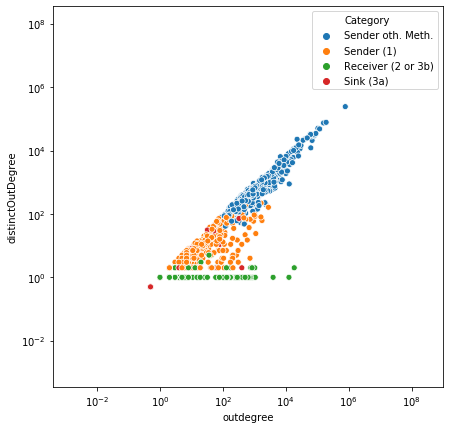

In [35]:
data = sql('''
SELECT 
    distinctInDegree, 
    distinctOutDegree,
    outDegree,
    involumeUSD > 4*outvolumeUSD as isSink,
    address.address in 
        (SELECT 
            cappReceiver.address
        FROM
            Address cappReceiver
            INNER JOIN
            AddressMetadata cappReceiverM
            INNER JOIN
            AddressMetadata cappSenderM
            INNER JOIN
            Transfer t
            ON
            t.`from` = cappReceiver.address and cappReceiver.isCappReceiver = 1
            and cappReceiverM.address = cappReceiver.address
            and t.`to` = cappSenderM.address
            and not cappReceiver.address = cappSenderM.address
        GROUP BY cappReceiver.address
        HAVING cappReceiverM.distinctOutDegree > MIN(cappSenderM.distinctOutDegree)) as isSender
FROM 
    address Natural JOIN addressMetadata 
where isCappReceiver = 1''')

data.loc[data['distinctInDegree'] == 0, ['distinctInDegree']] = 0.5
data.loc[data['distinctOutDegree'] == 0, 'distinctOutDegree'] = 0.5
data.loc[data['outdegree'] == 0, 'outdegree'] = 0.5
data['Category'] = 'Receiver (2 or 3b)'
data.loc[data['isSender'] == 1, 'Category'] = 'Sender (1)'
data.loc[data['isSink'] == 1, 'Category'] = 'Sink (3a)'
data.loc[data['distinctOutDegree'] > 0.33 * data['distinctInDegree'], 'Category'] = 'Sender oth. Meth.'
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(data=data, ax=ax, x='outdegree', y='distinctOutDegree', hue="Category")

In [33]:
data[data['distinctOutDegree'] > 0.5 * data['distinctInDegree']]

,distinctInDegree,distinctOutDegree,outdegree,isSink,isSender,Category
0,217772.0,242500.0,767554.0,0,1,Sender (1)
3,20690.0,12757.0,25879.0,0,1,Sender (1)
5,5717.0,3702.0,10352.0,0,1,Sender (1)
6,16996.0,20824.0,67780.0,0,1,Sender (1)
7,4772.0,3052.0,5927.0,1,1,Sink (3a)
8,3272.0,3976.0,10281.0,0,1,Sender (1)
10,342.0,2747.0,6091.0,0,1,Sender (1)
12,11283.0,9867.0,18752.0,0,1,Sender (1)
13,9613.0,9084.0,15755.0,0,1,Sender (1)
14,24773.0,29346.0,60409.0,0,1,Sender (1)


In [107]:
sql('''UPDATE Address
SET isCappSender = 1
WHERE address in
(SELECT 
    sender.address
FROM
    address rec 
    INNER JOIN 
    AddressMetadata recM
    INNER JOIN
    transfer t
    INNER JOIN
    address sender
    INNER JOIN
    AddressMetadata senderM
    ON rec.address = t.`from` and sender.address = t.`to` and rec.address = recM.address and sender.address = senderM.address
WHERE 
    rec.isCappReceiver=1 and 
    senderM.distinctOutDegree > 100 and
	(senderM.distinctInDegree < 100 or sender.isCappReceiver = 1)
GROUP BY rec.address, sender.address
HAVING 
	SUM(t.amountInUSDCurrent) / (1.0 * recM.involumeUSD) > 0.001 and 
	count(*) / (1.0 * recM.outDegree) > 0.05
);''')

TypeError: 'NoneType' object is not iterable

In [119]:
sql('''
SELECT 
	a.address
FROM 
    Address a
WHERE
    a.isCappReceiver = 0 and a.isCappSender = 0 and 
    EXISTS
		(SELECT inT.`to`
		FROM
			Transfer inT
		INNER JOIN
			Transfer outT
        INNER JOIN
            Address receiver
		ON 
                inT.`to` = outT.`from` AND 
                inT.`from` = a.address AND 
                outT.`to` = a.address AND 
                receiver.isCappReceiver = 1 and receiver.isCappSender = 1 and
                inT.`to` = receiver.address and
                inT.amountInUSDCurrent > 100 and
                outT.amountInUSDCurrent > 100)''')

,address
0,0x742d35cc6634c0532925a3b844bc454e4438f44e
1,0x6025d96932d378be7d0a46343b437678a126ecca
2,0xb726da4fbdc3e4dbda97bb20998cf899b0e727e0
3,0xa12431d0b9db640034b0cdfceef9cce161e62be4
4,0x8533a0bd9310eb63e7cc8e1116c18a3d67b1976a
5,0x629a7144235259336ea2694167f3c8b856edd7dc
6,0x1f573d6fb3f13d689ff844b4ce37794d79a7ff1c
7,0x27695e09149adc738a978e9a678f99e4c39e9eb9
8,0xd76b5c2a23ef78368d8e34288b5b65d616b746ae
9,0xbbc79794599b19274850492394004087cbf89710


In [ ]:
data = sql('''
SELECT
	coldWallet.*
FROM 
	Address receiver
	INNER JOIN
	Transfer fromReceiver
	INNER JOIN
	Address coldWallet
	INNER JOIN 
	Transfer toSender
	INNER JOIN 
	Address sender
	INNER JOIN
	AddressMetadata coldWalletM
ON
	receiver.address = fromReceiver.`from` and
	fromReceiver.`to` = coldWallet.address and
	coldWallet.address = toSender.`from` and
	toSender.`to` = sender.address and
	coldWallet.address = coldWalletM.address
WHERE
	receiver.isCappReceiver = 1 and
	sender.isCappSender = 1 and
	coldWallet.isDepositAddress = 0 and
	coldWalletM.involumeUSD > 5000
GROUP BY coldWallet.address
HAVING 
	SUM(fromReceiver.amountInUSDCurrent) > 0.8*coldWalletM.involumeUSD and 
	SUM(toSender.amountInUSDCurrent) > 0.8*coldWalletM.outvolumeUSD 
''')
data


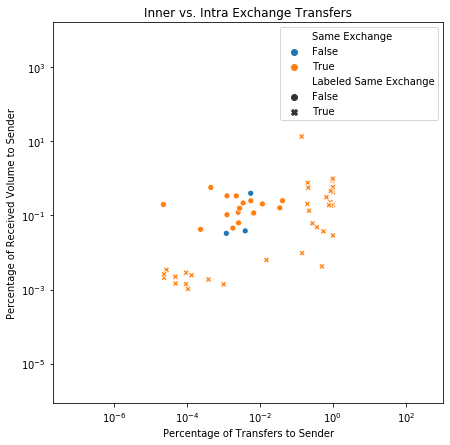

In [70]:
data['recv_short'] = data['recv_name'].apply(lambda x: x.split()[0].replace(':',''))
data['sndr_short'] = data['sndr_name'].apply(lambda x: x.split()[0].replace(':',''))
data['Same Exchange'] = data['recv_short'] == data['sndr_short']

data['Labeled Same Exchange'] = False
data.loc[data['percentage_volume'] <= 0.01, 'Labeled Same Exchange'] = True
data.loc[data['percentage_transfers'] > 0.05, 'Labeled Same Exchange'] = True

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")

data_small = data#[data['distinctOutDegree'] >= 100]

#data.loc[data['percentage_transfers'] == 0, ['percentage_transfers']] = 0.00000000001
#data.loc[data['percentage_volume'] == 0, 'percentage_volume'] = 0.00000000001
sns.scatterplot(data=data_small, hue='Same Exchange', x='percentage_transfers', y='percentage_volume', style='Labeled Same Exchange', ax=ax)
ax.set_ylabel("Percentage of Received Volume to Sender")
ax.set_xlabel("Percentage of Transfers to Sender")
ax.set_title('Inner vs. Intra Exchange Transfers')

plt.savefig('inner_intra_exchange.pdf')

In [4]:
sql('''
SELECT 
    coldWallet.*, 
    SUM(fromReceiver.amountInUSDCurrent) / 1.0/receiverM.involumeUSD as percentage, 
    coldWalletM.distinctOutDegree,
    receiver.address,
    receiver.name
FROM 
    Address receiver
    INNER JOIN
    AddressMetadata receiverM
	INNER JOIN
	Transfer fromReceiver
	INNER JOIN
	Address coldWallet
    INNER JOIN 
    AddressMetadata coldWalletM
ON
	receiver.address = fromReceiver.`from` and
	fromReceiver.`to` = coldWallet.address and
    receiverM.address = receiver.address and
    coldWalletM.address = coldWallet.address
WHERE
    receiver.isCappReceiver = 1 and
    coldWallet.isDepositAddress = 0 and
    coldWallet.isCappSender = 0 and
    coldWalletM.distinctOutDegree < 10
GROUP BY coldWallet.address, receiver.address
HAVING SUM(fromReceiver.amountInUSDCurrent) > 0.05 * receiverM.involumeUSD''')

,address,name,url,isExchange,isDepositAddress,isCappReceiver,isCappSender,isCappStorage,isCappOther,isOriginAddress,cluster,percentage,distinctOutDegree,address,name
0,0x0000000000000000000000000000000000000001,None,None,0,0,0,0,0,0,0,None,0.345835,1,0x50cbc6faeee68fb63e0a3c8ac8cda8a8505c960b,None
1,0x0000000000000000000000000000000000000001,None,None,0,0,0,0,0,0,0,None,0.992252,1,0x66bc589177121c8a8aa052aef1d21b935f3c72bf,None
2,0x0000000000000000000000000000000000000001,None,None,0,0,0,0,0,0,0,None,0.933348,1,0x9744e801a6a721cf25d2a52874d632a503952796,None
3,0x0000e1f761588d1b29714157d35ec7dca3e43566,None,None,0,0,0,0,0,0,0,None,0.117136,1,0x92b48905b488fe41cda567c8e3c039dbee2fe403,None
4,0x00021899062ed4df9d5e271c427017c2d6671553,None,None,0,0,1,0,0,0,0,None,0.990524,3,0x000427a10f8603f09610d9d107823aaf97a5ce92,None
5,0x001aa7a24b4305bc1bc61d093d4730c7e7902643,None,None,0,0,0,0,0,0,0,None,0.125239,1,0xe23d7b230effae584ac3e32e1fff2b7f05ec3b41,None
6,0x001fa9f18b8ee661f10b045e687cfdfa150580e8,None,None,0,0,0,0,0,0,0,None,0.131138,3,0x002d8cc52ea616d9cbc0c222e71a1b40a54065d0,None
7,0x0035f1c721b88a023a38d933234264721e85f7cf,None,None,0,0,0,0,0,0,0,None,0.613938,1,0xe85d4356355a6d29a3e8c7036dec456f77e4af5a,None
8,0x004ff8bfe1e512172cbf3e40b7d5a2286ad76ea0,None,None,0,0,0,0,0,0,0,None,0.055720,3,0x9a17aa3869a54c273291cbdd2464ac057b0f4a12,None
9,0x00720e185c2ed555535b79d2d8464f094201e220,None,None,0,0,0,0,0,0,0,None,0.067214,1,0x15a48d16758bfa206a2c9827d904aabcaa2c0ac7,None


In [23]:
d = sql('''
SELECT 
    numDepos as sentToNumDepos, count(*) as numAddresses
FROM
    (SELECT
        t.`from`,
        count(distinct depo.address) as numDepos
    FROM
        Address depo
        INNER JOIN
        Transfer t
        ON depo.address = t.`to`
    WHERE
        depo.isDepositAddress = 1
    GROUP BY
        t.`from`)
GROUP BY numDepos
ORDER BY sentToNumDepos
ASC
''')

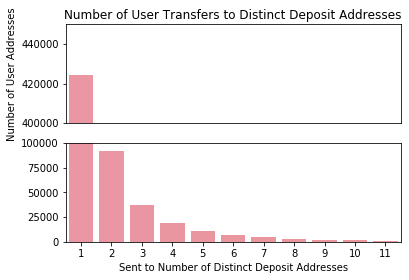

In [68]:
d['cumSum'] = d['numAddresses'].cumsum()
f, (ax2, ax1) = plt.subplots(ncols=1, nrows=2, sharex=True)

sns.barplot(data=d, x='sentToNumDepos', y='numAddresses', ax=ax2)
ax2.set_ylim(400000, 450000)
ax2.set_title('Number of User Transfers to Distinct Deposit Addresses')
sns.barplot(data=d, x='sentToNumDepos', y='numAddresses', ax=ax1)
ax1.set_xlim(-0.5, 10.5)
ax1.set_ylim(0, 100000)
ax1.set_ylabel('')
ax2.set_ylabel('Number of User Addresses')
ax1.set_xlabel('Sent to Number of Distinct Deposit Addresses')
ax2.xaxis.set_ticks_position('none') 
ax2.set_xlabel('')
plt.savefig('fig.pdf')

In [25]:
depos = sql('''
SELECT 
	rToC.*, cToS.sd, cToS.sd_n, cToS.sd_volume, cToS.sd_perc
FROM
	(SELECT
		coldWallet.address as cw,
		coldWallet.name as cw_n,
		receiver.address as rv,
		receiver.name as rv_n,
		SUM(amountInUSDCurrent) as rv_volume,
		SUM(amountInUSDCurrent) *1.0 / receiverM.outvolumeUSD as rv_perc 
	FROM
		(Address coldWallet
		NATURAL JOIN
		AddressMetadata coldWalletM)
		INNER JOIN
		(Address receiver
		NATURAL JOIN
		AddressMetadata receiverM)
		INNER JOIN
		Transfer rToc
	ON
		coldWallet.address = rToc.`to` AND
		receiver.address = rToc.`from`
	WHERE
		coldWallet.isDepositAddress = 0 AND
		coldWallet.isCappReceiver = 0 AND
		coldWallet.isCappSender = 0 AND
		receiver.isCappReceiver = 1
	GROUP BY receiver.address, coldWallet.address
	HAVING SUM(amountInUSDCurrent) > 0.05 * receiverM.outvolumeUSD
	) as rToC
INNER JOIN
	(SELECT
		coldWallet.address as cw,
		coldWallet.name as cw_n,
		sender.address as sd,
		sender.name as sd_n,
		SUM(amountInUSDCurrent) as sd_volume,
		SUM(amountInUSDCurrent) *1.0 / senderM.involumeUSD as sd_perc 
	FROM
		(Address coldWallet
		NATURAL JOIN
		AddressMetadata coldWalletM)
		INNER JOIN
		(Address sender
		NATURAL JOIN
		AddressMetadata senderM)
		INNER JOIN
		Transfer cToS
	ON
		coldWallet.address = cToS.`from` AND
		sender.address = cToS.`to`
	WHERE
		coldWallet.isDepositAddress = 0 AND
		coldWallet.isCappReceiver = 0 AND
		coldWallet.isCappSender = 0 AND
		sender.isCappSender = 1
	GROUP BY sender.address, coldWallet.address
	HAVING SUM(amountInUSDCurrent) > 0.05 * senderM.involumeUSD
	) as cToS
ON
	rToC.cw = cToS.cw
''')
depos

,cw,cw_n,rv,rv_n,rv_volume,rv_perc,sd,sd_n,sd_volume,sd_perc
0,0x4aee792a88edda29932254099b9d1e06d537883f,None,0x03747f06215b44e498831da019b27f53e483599f,None,20645751.71,0.319504,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,Bittrex 1,77155933.48,0.069403
1,0x5bd387c00ec5b4999800cf1223be1205aaa3a321,None,0x0659bbe8539b1afa3f1d38ef1f532227f3bb810e,None,658.70,0.525493,0x35954d07626f33d18ac33a7e0ec5f5399c8a5d8d,None,7008.21,0.050300
2,0x5bd387c00ec5b4999800cf1223be1205aaa3a321,None,0x0659bbe8539b1afa3f1d38ef1f532227f3bb810e,None,658.70,0.525493,0x64a521f12ff552abc2de2b64c01438085cf74f03,None,472.52,0.076609
3,0x5bd387c00ec5b4999800cf1223be1205aaa3a321,None,0x0659bbe8539b1afa3f1d38ef1f532227f3bb810e,None,658.70,0.525493,0x675380d07437b29d708ed492c1f29484c7728fe2,None,58333.63,0.059579
4,0x5bd387c00ec5b4999800cf1223be1205aaa3a321,None,0x0659bbe8539b1afa3f1d38ef1f532227f3bb810e,None,658.70,0.525493,0x7745122fd6d0522d42b38366f4fcc0b587349475,None,13167.03,0.113943
5,0x5bd387c00ec5b4999800cf1223be1205aaa3a321,None,0x0659bbe8539b1afa3f1d38ef1f532227f3bb810e,None,658.70,0.525493,0xb41a36453a2aa90d81a90a8e69e3fa47a546dc78,None,3375.70,0.072348
6,0x5bd387c00ec5b4999800cf1223be1205aaa3a321,None,0x0659bbe8539b1afa3f1d38ef1f532227f3bb810e,None,658.70,0.525493,0xc5aa1e0c5ada74469fc6093879abacf6295f5115,None,1415.46,0.117737
7,0x5bd387c00ec5b4999800cf1223be1205aaa3a321,None,0x0659bbe8539b1afa3f1d38ef1f532227f3bb810e,None,658.70,0.525493,0xcd34538a45bc4555e4a6924bb79e4b52df4dd230,None,146241.18,0.215517
8,0x5bd387c00ec5b4999800cf1223be1205aaa3a321,None,0x0659bbe8539b1afa3f1d38ef1f532227f3bb810e,None,658.70,0.525493,0xdfe5ed9711d1b2bfc7ddf7f1b8783cb66ac79833,None,10572.20,0.065083
9,0xf4b51b14b9ee30dc37ec970b50a486f37686e2a8,None,0x1151314c646ce4e0efd76d1af4760ae66a9fe30f,Bitfinex 1,67612516.16,0.634736,0x876eabf441b2ee5b5b0554fd502a8e0600950cfa,Bitfinex 4,23422622.33,0.070646


In [26]:
depos.groupby('rv').count()

,cw,cw_n,rv_n,rv_volume,rv_perc,sd,sd_n,sd_volume,sd_perc
rv,,,,,,,,,
0x03747f06215b44e498831da019b27f53e483599f,1,0,0,1,1,1,1,1,1
0x0659bbe8539b1afa3f1d38ef1f532227f3bb810e,8,0,0,8,8,8,0,8,8
0x1151314c646ce4e0efd76d1af4760ae66a9fe30f,1,0,1,1,1,1,1,1,1
0x145c9d4565e8291caa8ec92fefb571e1315e744b,10,10,0,10,10,10,0,10,10
0x146803545dc9c9e5fe9c50cffec9c15976e720bd,8,0,0,8,8,8,0,8,8
0x15340d997dcfdefb839cc10c705028935e2d09a2,4,0,0,4,4,4,0,4,4
0x16ea86aad10cfd1fb856fe0eab08399e9749468f,4,0,0,4,4,4,0,4,4
0x17bc58b788808dab201a9a90817ff3c168bf3d61,1,1,0,1,1,1,1,1,1
0x19ac0a2fcada93d7b8010472a7462cd214fe6dbe,1,0,0,1,1,1,0,1,1


In [35]:
sql('''
SELECT 
	c.clusterName, c.member
FROM
    cluster c
    INNER JOIN
    Address a
    ON c.member = a.address''')

,clusterName,member
0,0x72548c0370788c2b7bfb7b1946c79c2a5528570d-couse,0x3052cd6bf951449a984fe4b5a38b46aef9455c8e
1,0xe255bf709df6036060fb2318e174957d280eb109-couse,0x1706024467ef8c9c4648da6fc35f2c995ac79cf6
2,0x77f5a647e3c4f83799f5a388b2d4ea661c971e85-couse,0xdf4d1b71aa4b8bb6814b2e5819844c3093a56349
3,0xc798f0344a45be6261c4338cb6cc03d349591009-couse,0xd78331e9dd5b7dc506da403d37a43b1335fbdd11
4,0xf982a6face63517bf71016d5591a7eb152c1b048-couse,0x4a8d9b64ee9c7e058fe9c8cbf96375b02da006e2
5,0xf40db9f274f1c124864d935d596cd3bc82b901e3-couse,0x66817272d39da7fd4c552f430fc0b694e357c157
6,0x62f32892f7afe6524c87d4ecf3fc5fd1b1e21cd7-couse,0x44705e1d11142cd7b0bdfb2ecc0c63784a31f14f
7,0x8f111aeae12a44a92628c82862d5f412ef6f086e-couse,0x9d61de20d2987eeabaa3b384ff6b5001ca570787
8,0x488d84a8633dfbb88fddc39fe034acbdf310c265-couse,0x13803f5e158fec64ae7d81ed6799398ab4eb1fee
9,0xcdb20bbb5e8df60ed9fd2ed5effda4eb2a48409d-couse,0x2cbc78b7db97576674cc4e442d3f4d792b43a3a9


In [95]:
sql('''
SELECT * 
FROM 
    Address NATURAL JOIN AddressMetadata
WHERE 
    isCappSender = 1
    and isCappReceiver = 0
    and distinctInDegree >= 25''')

,address,name,url,isExchange,isDepositAddress,isCappReceiver,isCappSender,isCappStorage,isCappOther,isOriginAddress,...,behavedLikeDepositAddress,involumeUSD,outvolumeUSD,outdegreeFraction,outvolumeFraction,isConcentrator,isMixer,isDiluter,firstOutBlocknumber,canBePaperWallet
